In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

dataset = pd.read_csv("ttt_dataset.csv")

print(dataset.head(5))
dataset = dataset.replace('?', 100)
X = dataset.iloc[:,0:7]
y = dataset.iloc[:,-1]
print(X.head(5))
print(y.head(5))
print(dataset.dtypes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

   MOVE1 MOVE2 MOVE3 MOVE4 MOVE5 MOVE6 MOVE7 CLASS
0      0     8     1     3     ?     ?     ?  loss
1      4     7     2     6     ?     ?     ?   win
2      0     8     1     6     5     ?     ?  draw
3      4     7     2     3     ?     ?     ?  draw
4      0     4     2     1     ?     ?     ?   win
   MOVE1 MOVE2 MOVE3 MOVE4 MOVE5 MOVE6 MOVE7
0      0     8     1     3   100   100   100
1      4     7     2     6   100   100   100
2      0     8     1     6     5   100   100
3      4     7     2     3   100   100   100
4      0     4     2     1   100   100   100
0    loss
1     win
2    draw
3    draw
4     win
Name: CLASS, dtype: object
MOVE1     int64
MOVE2    object
MOVE3    object
MOVE4    object
MOVE5    object
MOVE6    object
MOVE7    object
CLASS    object
dtype: object


In [2]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 71.7570%
Log Loss: 4.324839200506382
SVC
****Results****
Accuracy: 48.8506%
Log Loss: 0.6197841914335248
NuSVC
****Results****
Accuracy: 70.6897%
Log Loss: 0.5931188439234639
DecisionTreeClassifier
****Results****
Accuracy: 74.7947%
Log Loss: 6.785008911781157
RandomForestClassifier
****Results****
Accuracy: 74.3842%
Log Loss: 2.0659649323214517
AdaBoostClassifier
****Results****
Accuracy: 66.7488%
Log Loss: 1.0172460315661587
GradientBoostingClassifier
****Results****
Accuracy: 73.6453%
Log Loss: 0.6448079473743807
GaussianNB
****Results****
Accuracy: 66.0920%
Log Loss: 1.583521875371602
LinearDiscriminantAnalysis
****Results****
Accuracy: 69.2939%
Log Loss: 0.7263630857764873
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 26.4368%
Log Loss: 18.263213660938607


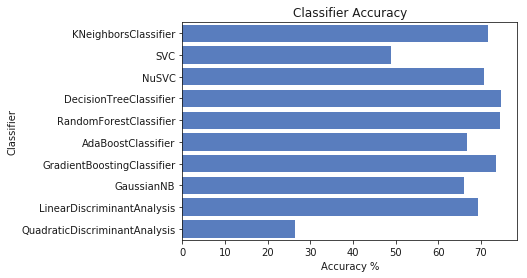

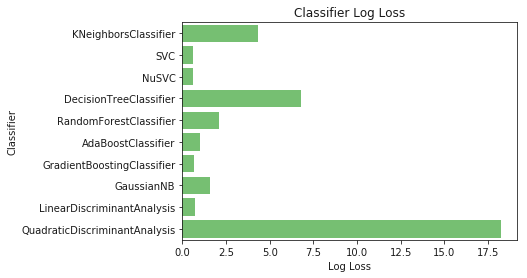

In [3]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()